In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('Obesity or CVD risk prediction.csv')

In [3]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### Convert Categorical to Numerical

In [6]:
LE = LabelEncoder()

In [7]:
data['NObeyesdad'] = LE.fit_transform(data['NObeyesdad'])

In [8]:
data['SMOKE'] = LE.fit_transform(data['SMOKE'])

In [9]:
data['FAVC'] = LE.fit_transform(data['FAVC'])

In [10]:
data['Gender'] = LE.fit_transform(data['Gender'])

In [11]:
data['family_history_with_overweight'] = LE.fit_transform(data['family_history_with_overweight'])

In [12]:
data['CALC'] = LE.fit_transform(data['CALC'])

In [13]:
data['SCC'] = data['SCC'].map({'yes':1,'no':0})

In [14]:
data['CAEC'] = LE.fit_transform(data['CAEC'])

In [15]:
data['MTRANS'] = LE.fit_transform(data['MTRANS'])

In [16]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [17]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

### Check Outlier

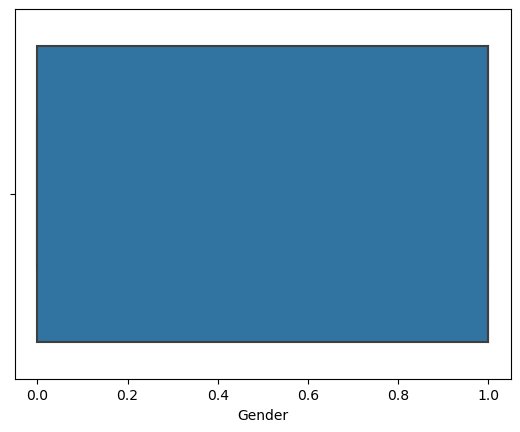

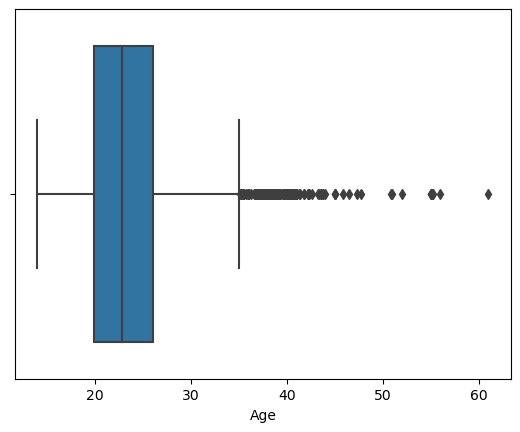

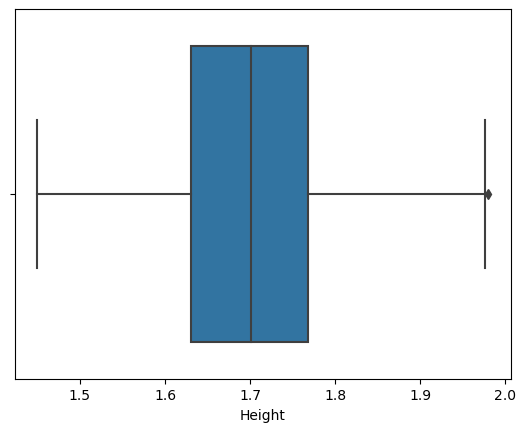

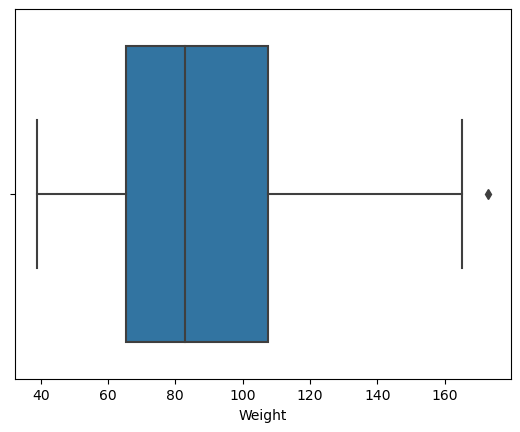

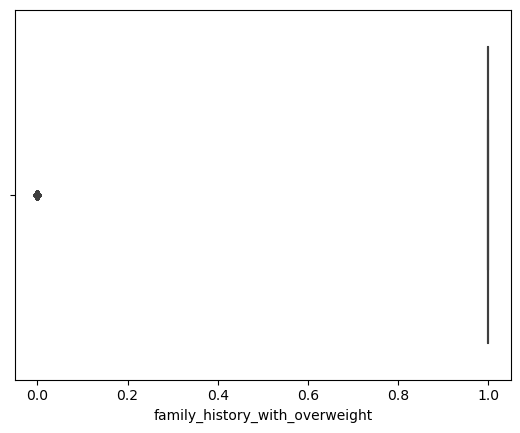

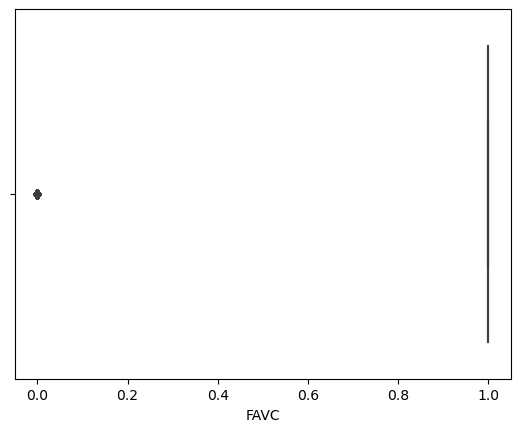

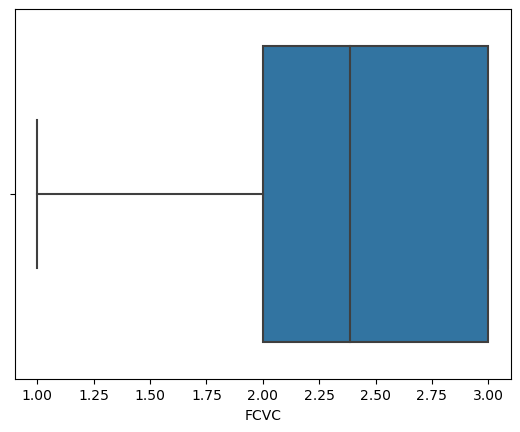

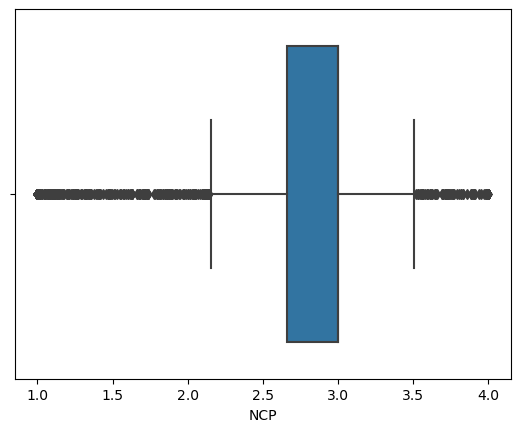

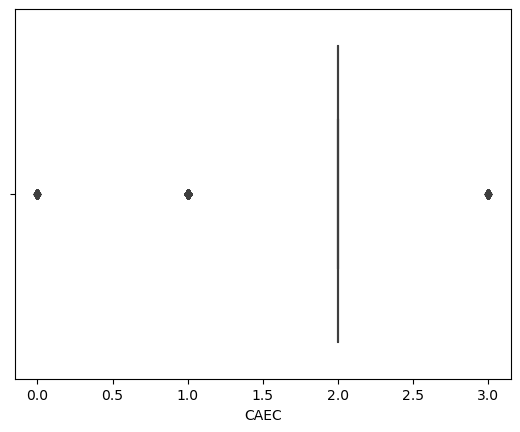

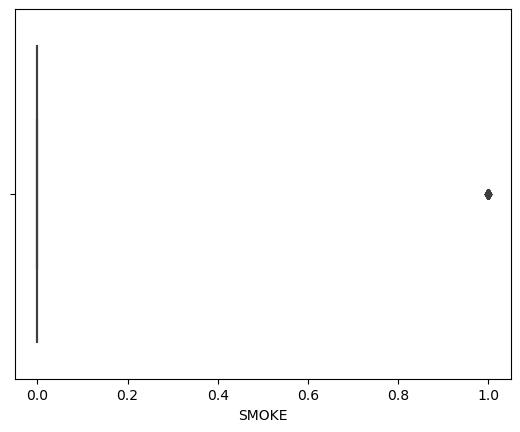

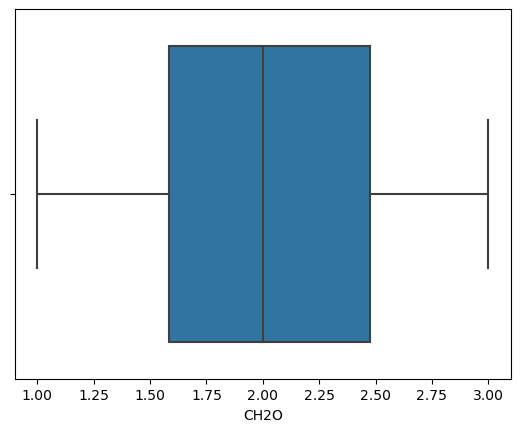

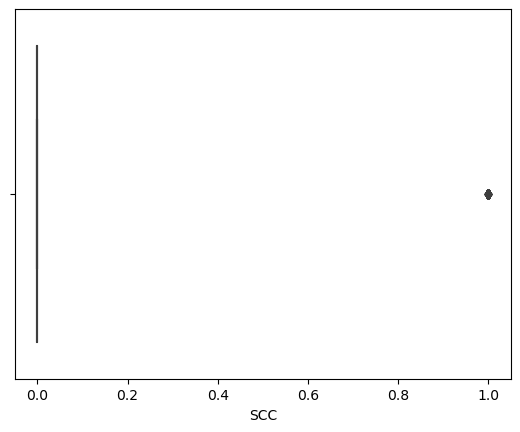

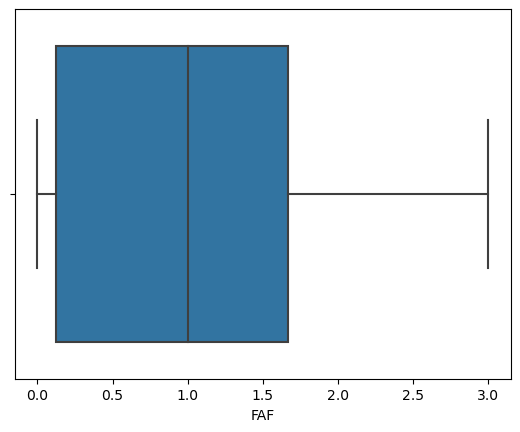

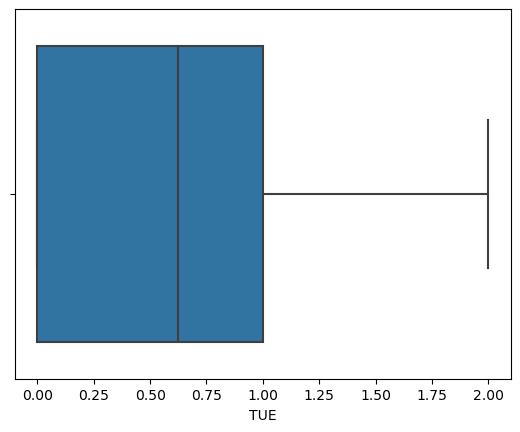

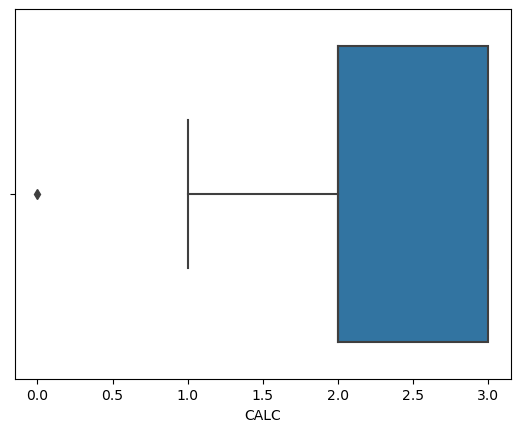

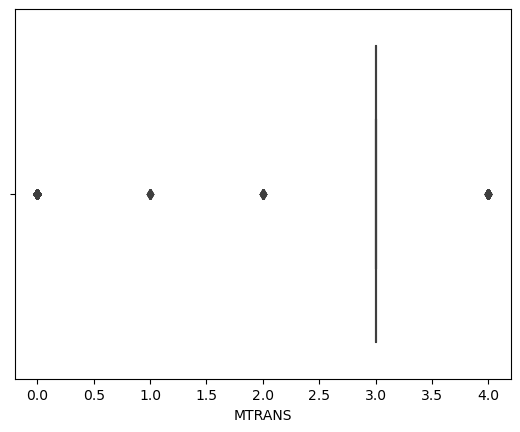

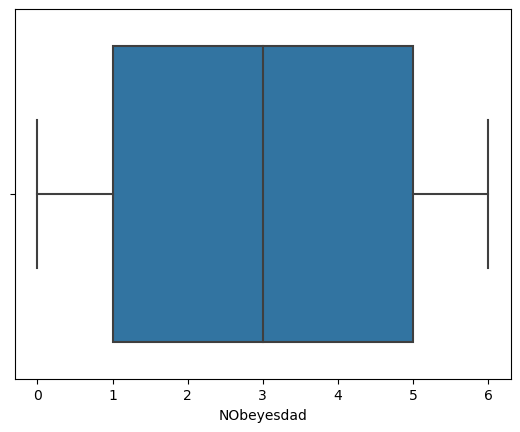

In [18]:
for i in data.select_dtypes(include = ['int','float']):
    sns.boxplot(data=data, x = i)
    plt.show()

### Remove Outlier

In [19]:
def outlier_treatment(col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    UB = Q3 + 1.5 * IQR
    LB = Q1 - 1.5 * IQR
    Upper_Outlier = data[col]>UB
    Lower_Outlier = data[col]<LB
    data.loc[Upper_Outlier, col] = data[col].median()
    data.loc[Lower_Outlier, col] = data[col].median()
    return data

In [20]:
for i in data.select_dtypes(['int','float']):
    outlier_treatment(i)

In [21]:
#for i in data.select_dtypes(['int','float']):
   # sns.boxplot(data = data, x = i)
   # plt.show()

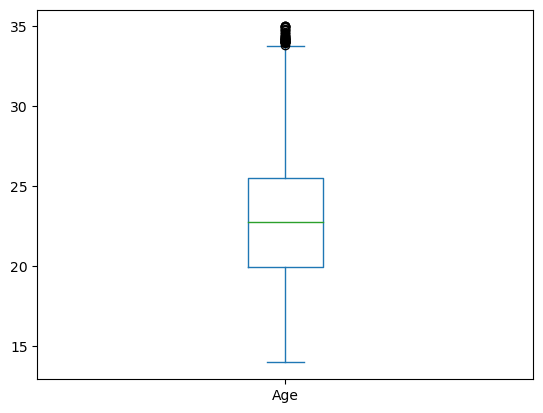

In [22]:
data['Age'].plot(kind = 'box')
plt.show()

### Skew

In [23]:
data.select_dtypes(['int','float']).skew()

Gender                           -0.023704
Age                               0.828893
Height                           -0.021337
Weight                            0.245126
family_history_with_overweight    0.000000
FAVC                              0.000000
FCVC                             -0.432906
NCP                              -2.806292
CAEC                              0.000000
SMOKE                             0.000000
CH2O                             -0.104912
SCC                               0.000000
FAF                               0.498490
TUE                               0.618502
CALC                              0.275104
MTRANS                            0.000000
NObeyesdad                        0.006754
dtype: float64

### Distribution

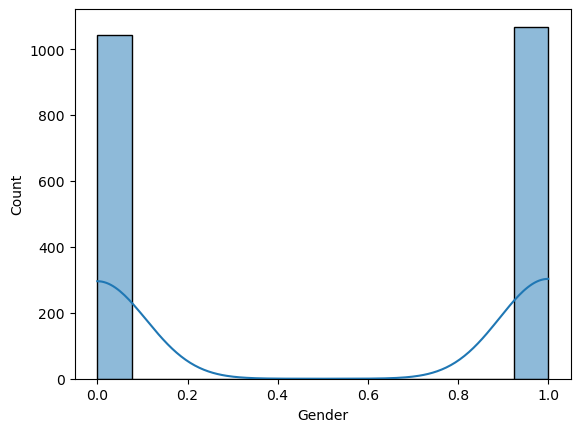

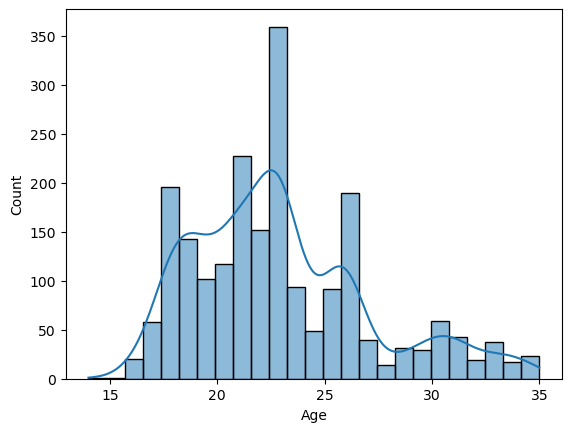

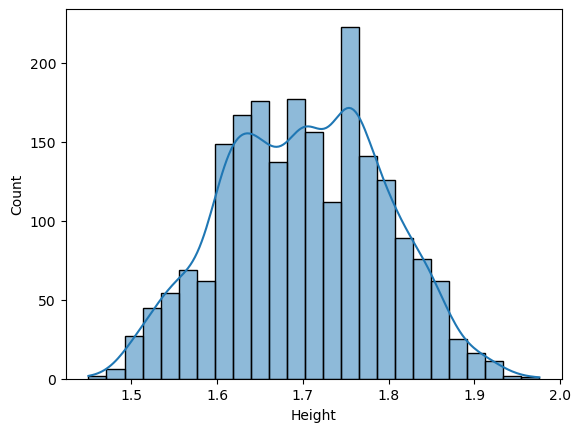

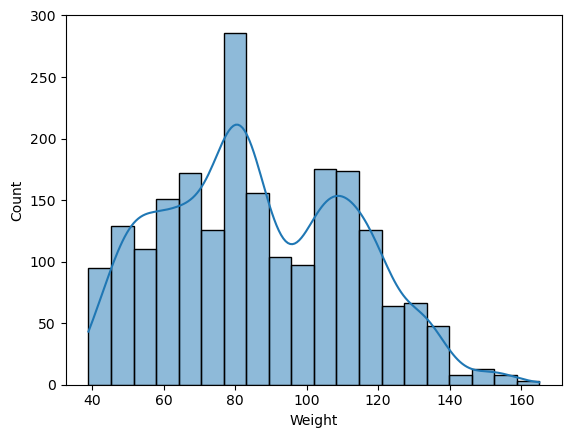

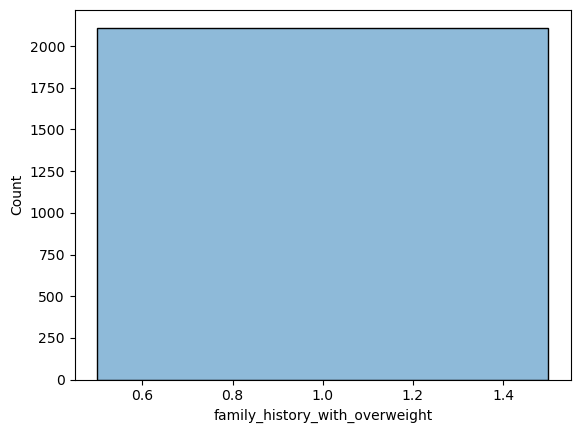

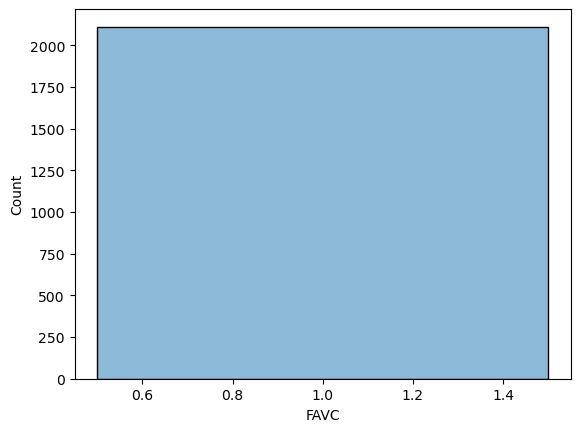

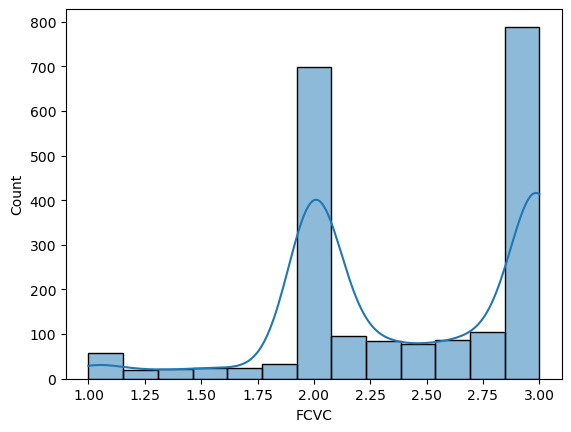

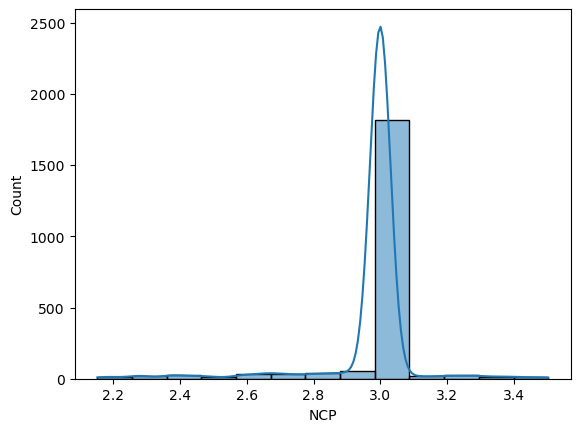

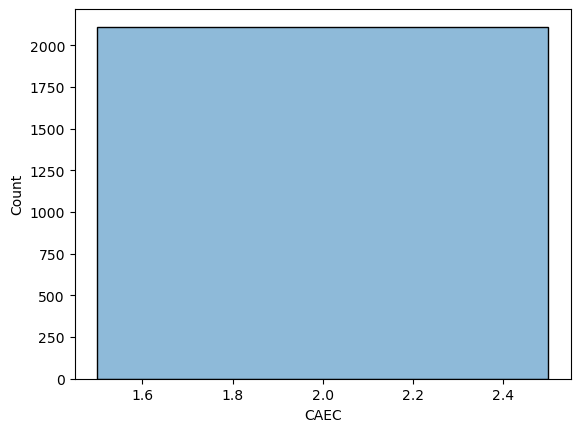

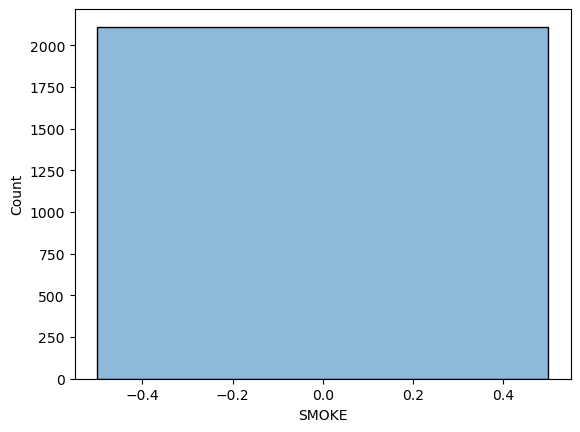

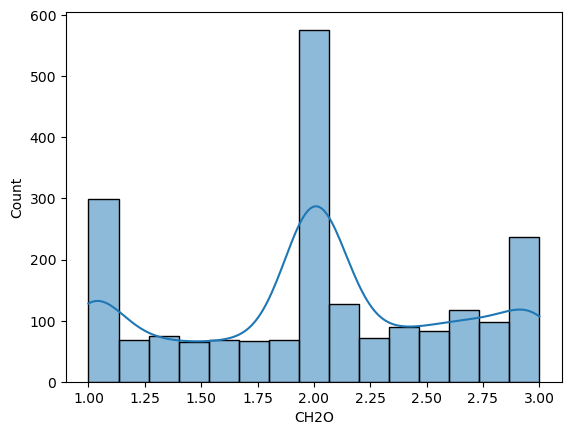

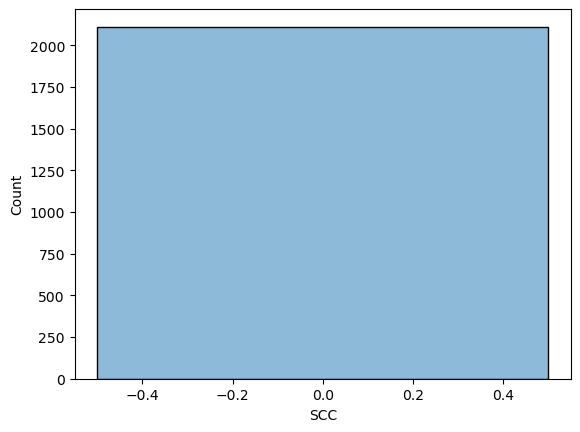

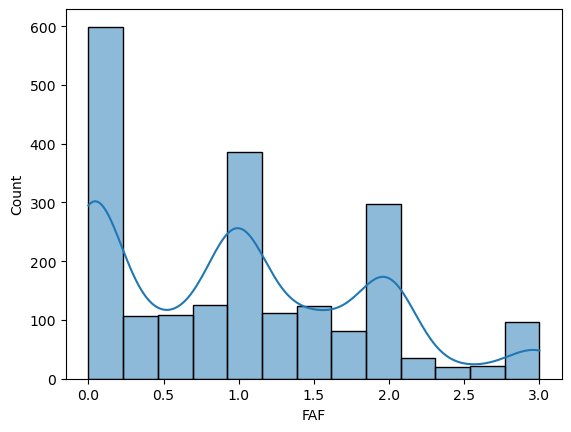

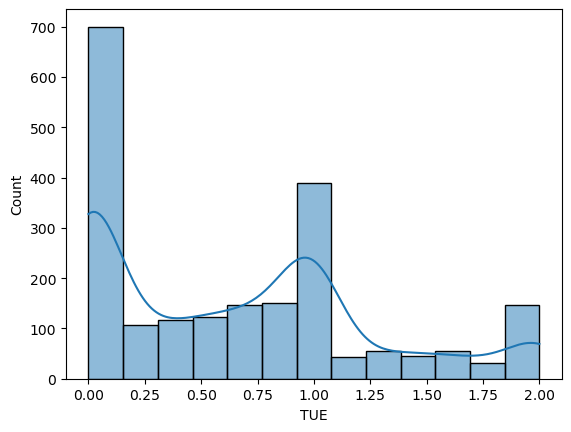

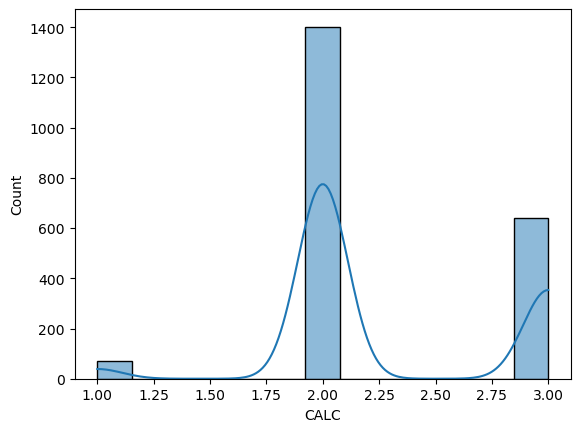

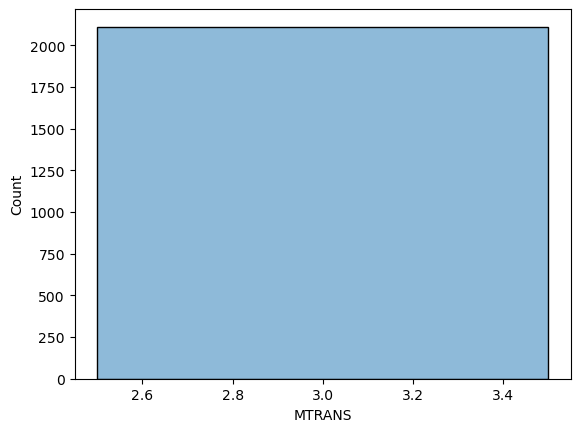

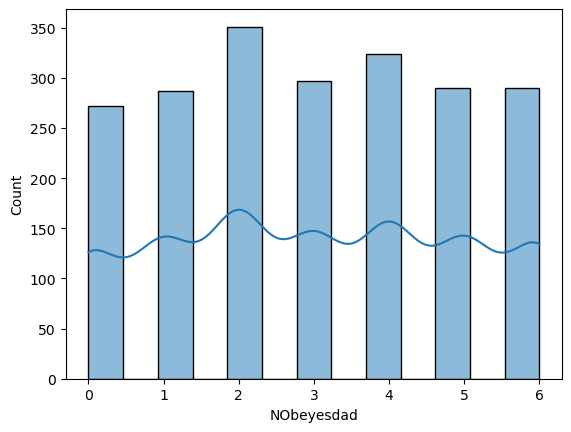

In [24]:
for i in data.select_dtypes(['int','float']):
    sns.histplot(data = data, x = i, kde = True)
    plt.show()

### Transformation

In [25]:
sqrt_data = np.sqrt(data)

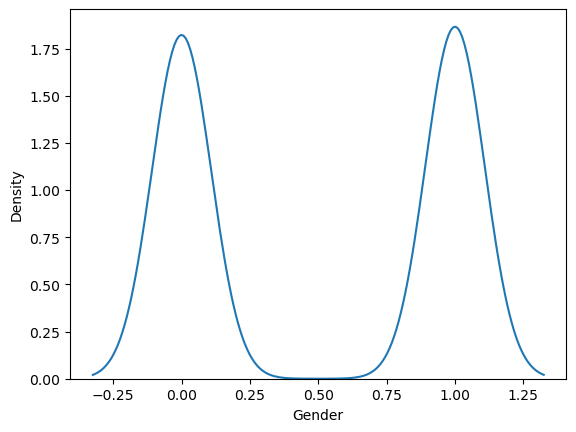

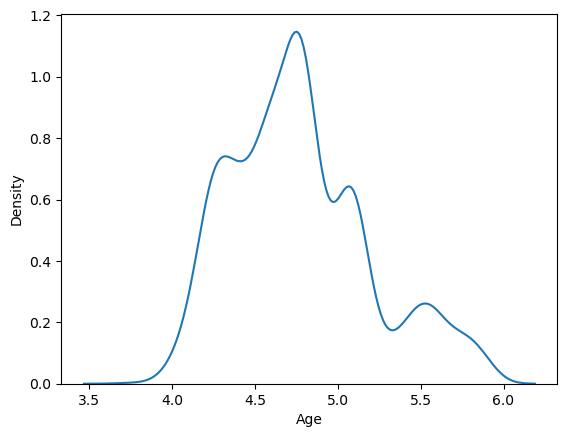

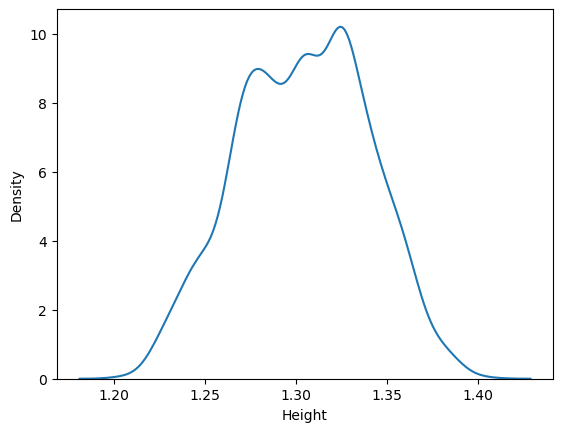

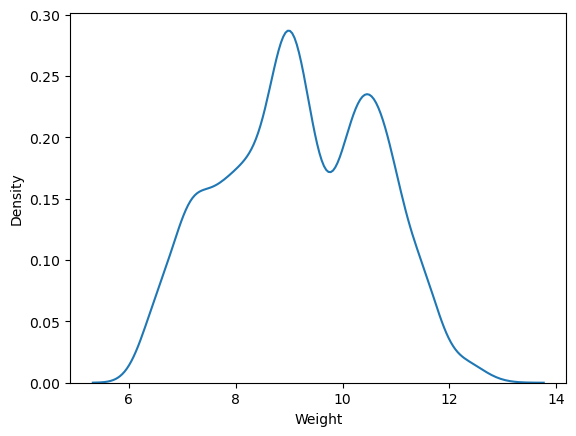

C:\Users\asmaj\AppData\Local\Temp\ipykernel_8456\38266468.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = sqrt_data, x =i)


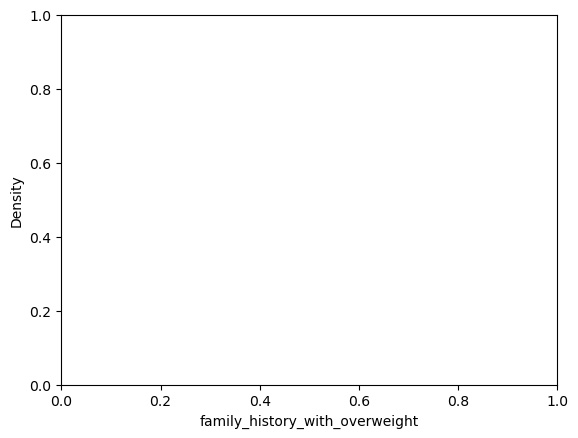

C:\Users\asmaj\AppData\Local\Temp\ipykernel_8456\38266468.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = sqrt_data, x =i)


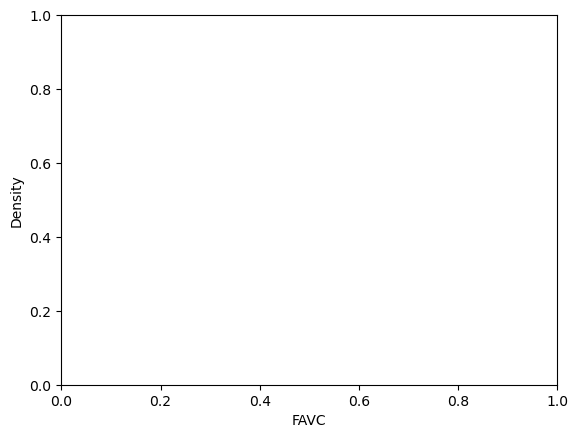

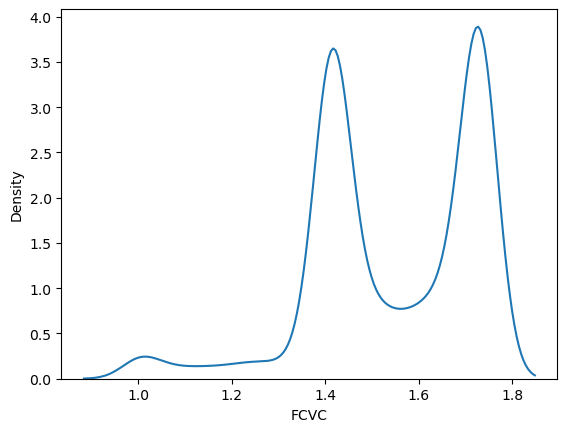

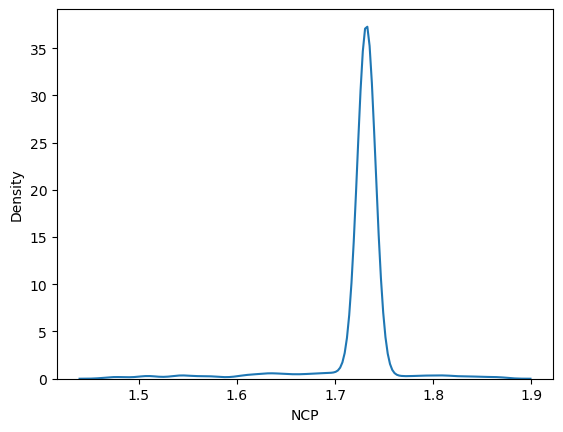

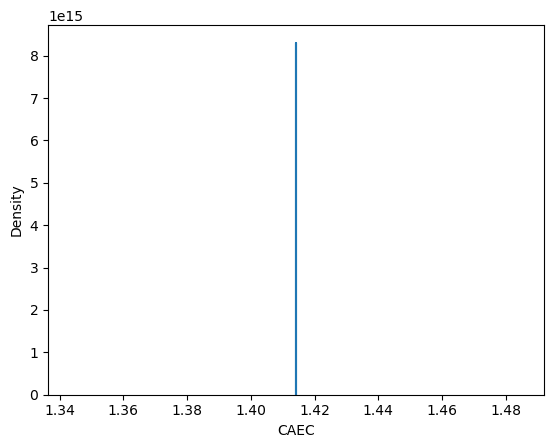

C:\Users\asmaj\AppData\Local\Temp\ipykernel_8456\38266468.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = sqrt_data, x =i)


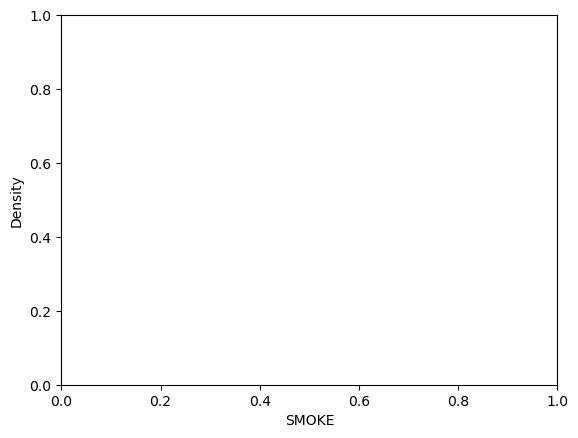

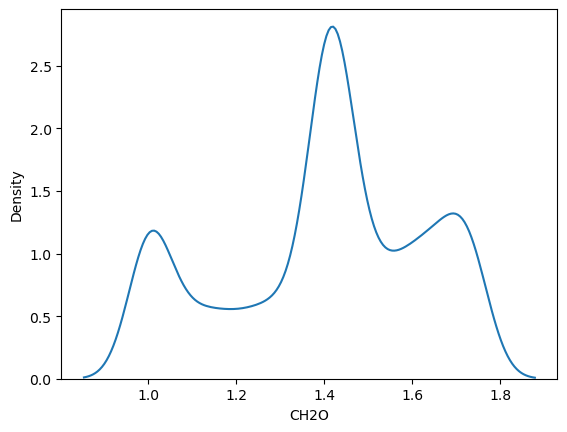

C:\Users\asmaj\AppData\Local\Temp\ipykernel_8456\38266468.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = sqrt_data, x =i)


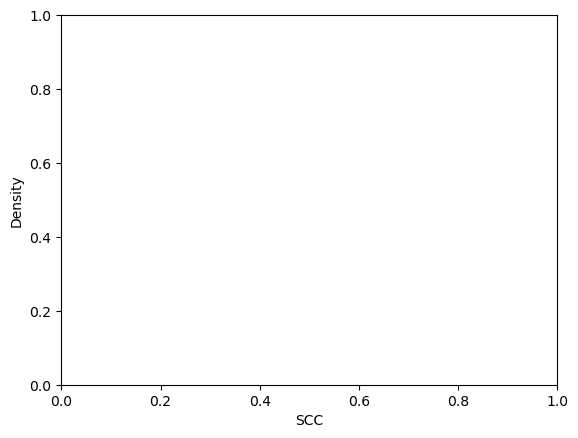

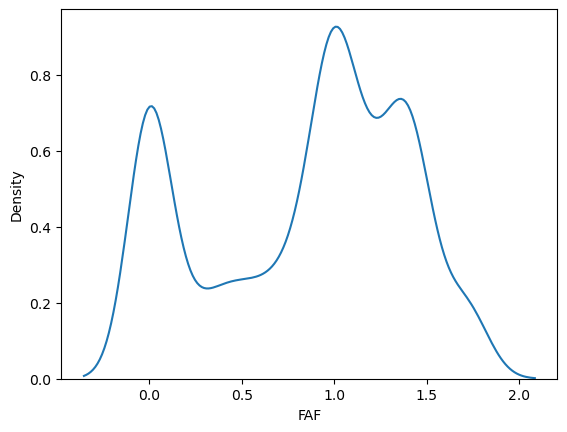

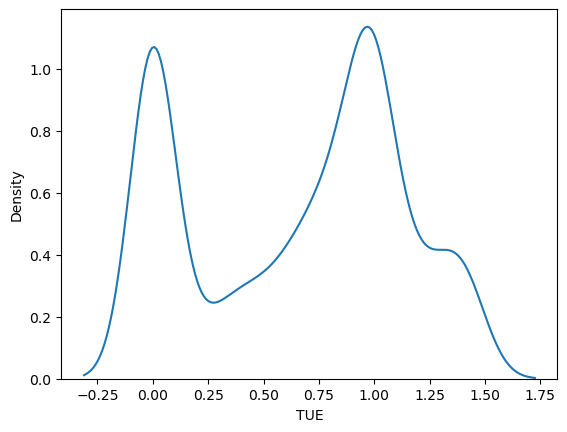

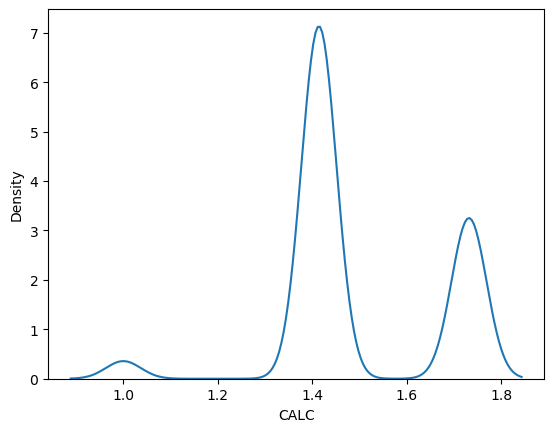

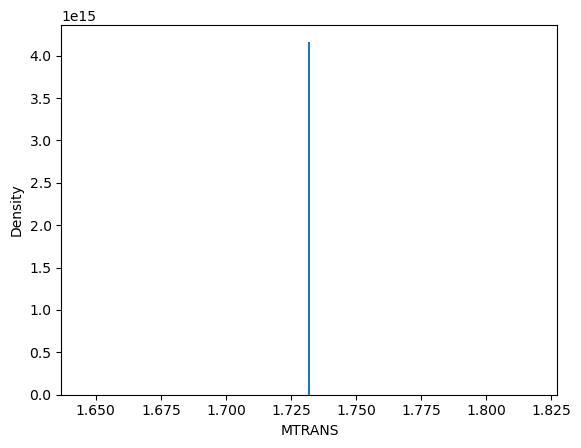

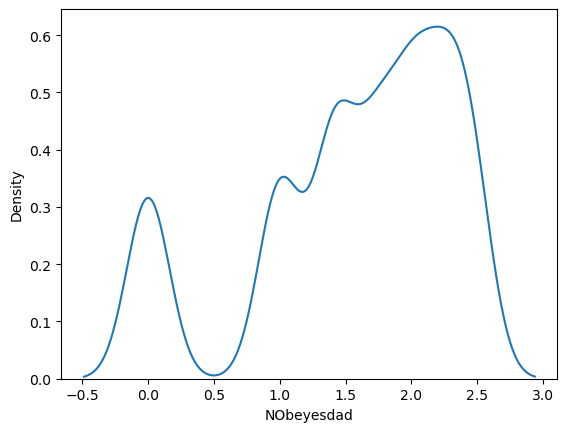

In [26]:
for i in sqrt_data:
    sns.kdeplot(data = sqrt_data, x =i)
    plt.show()

### Split dependent and indepandent variable

In [27]:
X = data.drop('NObeyesdad',axis = 1)

In [28]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.000000,1.620000,64.000000,1,1,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3
1,0,21.000000,1.520000,56.000000,1,1,3.0,3.0,2,0,3.000000,0,3.000000,0.000000,2,3
2,1,23.000000,1.800000,77.000000,1,1,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3
3,1,27.000000,1.800000,87.000000,1,1,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,3
4,1,22.000000,1.780000,89.800000,1,1,2.0,3.0,2,0,2.000000,0,0.000000,0.000000,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3


In [29]:
y = data.NObeyesdad

In [30]:
y

0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: NObeyesdad, Length: 2111, dtype: int32

### Apply ML Model

### Using Classification Model

In [31]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

### Logistic Regression

In [32]:
LR = LogisticRegression()

In [33]:
LR.fit(x_train,y_train)

C:\Users\asmaj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
Lr_model_predict = LR.predict(x_test)

In [35]:
Lr_model_predict

array([3, 2, 6, 4, 4, 3, 0, 4, 2, 3, 4, 2, 1, 2, 1, 6, 5, 4, 6, 5, 4, 2,
       2, 2, 2, 3, 4, 5, 5, 3, 5, 1, 2, 5, 3, 6, 6, 0, 5, 0, 5, 2, 0, 5,
       4, 6, 2, 0, 4, 1, 1, 3, 3, 6, 2, 2, 2, 5, 3, 1, 2, 0, 4, 0, 0, 3,
       5, 5, 5, 6, 6, 4, 6, 2, 5, 1, 2, 5, 3, 0, 2, 6, 2, 2, 5, 1, 0, 3,
       4, 3, 5, 0, 1, 6, 2, 4, 2, 3, 3, 3, 0, 2, 0, 5, 4, 2, 2, 4, 5, 1,
       0, 6, 5, 1, 2, 2, 3, 2, 6, 0, 2, 4, 0, 0, 4, 5, 5, 5, 1, 5, 0, 0,
       1, 3, 6, 4, 5, 3, 4, 3, 2, 5, 0, 1, 0, 1, 3, 6, 5, 1, 6, 5, 4, 4,
       4, 5, 2, 1, 3, 5, 5, 4, 2, 4, 1, 0, 3, 2, 2, 4, 5, 6, 4, 5, 6, 3,
       2, 0, 1, 3, 5, 6, 4, 4, 4, 1, 5, 2, 6, 4, 5, 2, 3, 1, 1, 4, 3, 3,
       2, 5, 1, 0, 1, 1, 6, 6, 2, 5, 2, 0, 1, 1, 1, 2, 3, 3, 1, 4, 1, 4,
       3, 2, 0, 0, 4, 4, 5, 6, 2, 0, 4, 4, 5, 4, 0, 3, 1, 2, 2, 4, 2, 0,
       4, 4, 1, 1, 0, 4, 6, 6, 2, 5, 5, 4, 5, 4, 1, 4, 6, 6, 4, 1, 1, 5,
       0, 2, 3, 0, 1, 4, 5, 2, 4, 1, 2, 6, 0, 1, 0, 2, 6, 5, 0, 1, 2, 1,
       2, 4, 2, 4, 4, 3, 1, 4, 4, 5, 0, 1, 4, 4, 0,

In [36]:
y_test

1730    3
259     2
966     5
1911    4
1815    4
       ..
223     1
1755    3
1827    4
1745    3
1638    3
Name: NObeyesdad, Length: 423, dtype: int32

In [37]:
accuracy_score(y_test,Lr_model_predict)

0.6926713947990544

In [38]:
f1_score(y_test,Lr_model_predict, average='micro')

0.6926713947990544

In [39]:
recall_score(y_test,Lr_model_predict,average='micro')

0.6926713947990544

In [40]:
print(classification_report(y_test,Lr_model_predict))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        65
           1       0.59      0.65      0.62        57
           2       0.59      0.70      0.64        67
           3       0.89      0.77      0.83        53
           4       0.99      1.00      0.99        69
           5       0.54      0.56      0.55        57
           6       0.33      0.24      0.27        55

    accuracy                           0.69       423
   macro avg       0.68      0.68      0.68       423
weighted avg       0.69      0.69      0.69       423



### RandomForest Classifier

In [41]:
RFC = RandomForestClassifier()

In [42]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [43]:
rfc_predict = RFC.predict(x_test)

In [44]:
rfc_predict

array([3, 2, 5, 4, 4, 3, 0, 4, 2, 3, 4, 2, 5, 2, 1, 2, 1, 4, 6, 6, 4, 2,
       2, 6, 2, 3, 4, 6, 5, 3, 5, 6, 6, 2, 3, 5, 6, 0, 5, 1, 5, 6, 0, 5,
       4, 3, 2, 0, 4, 0, 5, 3, 3, 5, 2, 2, 5, 5, 3, 1, 2, 1, 2, 0, 0, 3,
       1, 5, 5, 2, 6, 4, 3, 2, 2, 1, 2, 5, 3, 0, 6, 5, 2, 5, 6, 1, 1, 3,
       4, 3, 5, 0, 0, 3, 6, 4, 2, 3, 3, 3, 0, 2, 0, 5, 4, 2, 6, 4, 5, 6,
       0, 5, 2, 1, 2, 6, 2, 2, 6, 0, 2, 4, 0, 1, 4, 6, 2, 5, 6, 5, 1, 1,
       1, 2, 6, 4, 5, 3, 4, 3, 6, 6, 1, 0, 0, 1, 6, 6, 2, 0, 6, 5, 4, 4,
       4, 2, 2, 1, 3, 5, 2, 4, 6, 4, 0, 0, 3, 2, 5, 4, 5, 3, 4, 1, 5, 3,
       2, 0, 1, 3, 5, 2, 4, 4, 4, 0, 5, 5, 3, 4, 2, 6, 3, 6, 1, 4, 3, 3,
       2, 5, 1, 0, 5, 5, 2, 6, 2, 2, 2, 0, 5, 1, 1, 3, 3, 6, 5, 4, 5, 4,
       3, 2, 1, 0, 4, 4, 1, 6, 5, 0, 4, 4, 5, 4, 0, 3, 1, 5, 2, 4, 2, 0,
       4, 4, 1, 1, 0, 4, 6, 5, 2, 5, 6, 4, 1, 4, 1, 4, 2, 1, 4, 1, 1, 1,
       0, 2, 3, 0, 1, 4, 6, 2, 4, 1, 2, 2, 1, 1, 1, 6, 2, 1, 0, 1, 6, 5,
       2, 4, 6, 4, 4, 3, 1, 4, 4, 5, 1, 1, 4, 4, 0,

In [45]:
y_test

1730    3
259     2
966     5
1911    4
1815    4
       ..
223     1
1755    3
1827    4
1745    3
1638    3
Name: NObeyesdad, Length: 423, dtype: int32

In [46]:
accuracy_score(y_test,rfc_predict)

0.9763593380614657

In [47]:
f1_score(y_test,rfc_predict,average='micro')

0.9763593380614657

In [48]:
recall_score(y_test,rfc_predict,average='micro')

0.9763593380614657

In [49]:
print(classification_report(y_test,rfc_predict))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        65
           1       0.93      0.98      0.96        57
           2       0.96      1.00      0.98        67
           3       1.00      1.00      1.00        53
           4       1.00      1.00      1.00        69
           5       0.97      0.98      0.97        57
           6       1.00      0.91      0.95        55

    accuracy                           0.98       423
   macro avg       0.98      0.98      0.98       423
weighted avg       0.98      0.98      0.98       423



In [50]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [51]:
RFC1 = RandomForestClassifier()

In [75]:
parameter = {'n_estimators':range(1,100),
    'criterion':['gini','entropy'],
    'max_depth':[5,8,9,10,15],
    'min_samples_split':range(1,5),
    'min_samples_leaf':range(1,5)}

In [76]:
RSCV = RandomizedSearchCV(estimator=RFC1,param_distributions=parameter,scoring='accuracy',cv=5)

In [77]:
RSCV.fit(x_train,y_train)

C:\Users\asmaj\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\asmaj\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asmaj\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\asmaj\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\asmaj\anaconda3\Lib\site-packages\

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 8, 9, 10, 15],
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(1, 5),
                                        'n_estimators': range(1, 100)},
                   scoring='accuracy')

In [78]:
RSCV.best_params_

{'n_estimators': 36,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_depth': 10,
 'criterion': 'entropy'}

### Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
DTC = DecisionTreeClassifier()

In [61]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [62]:
model_predict = DTC.predict(x_test)

In [63]:
model_predict

array([3, 6, 6, 4, 4, 3, 0, 4, 2, 3, 4, 2, 5, 2, 1, 2, 1, 4, 6, 6, 4, 2,
       2, 6, 2, 3, 4, 6, 5, 3, 5, 5, 6, 2, 3, 5, 6, 0, 5, 0, 1, 6, 0, 5,
       4, 3, 2, 0, 4, 0, 5, 3, 3, 5, 2, 2, 5, 1, 3, 1, 2, 1, 2, 0, 0, 3,
       1, 5, 5, 2, 6, 4, 2, 2, 2, 1, 2, 5, 3, 0, 6, 5, 2, 5, 6, 1, 1, 2,
       4, 3, 5, 0, 0, 3, 6, 4, 2, 3, 3, 3, 0, 2, 0, 5, 4, 2, 6, 4, 5, 6,
       0, 6, 2, 1, 2, 6, 2, 2, 6, 0, 2, 4, 0, 1, 4, 6, 2, 5, 6, 5, 1, 1,
       1, 2, 6, 4, 5, 3, 4, 3, 2, 6, 1, 0, 0, 1, 6, 6, 2, 0, 6, 5, 4, 4,
       4, 2, 2, 1, 3, 5, 2, 4, 2, 4, 0, 0, 3, 2, 5, 4, 5, 3, 4, 1, 5, 3,
       2, 1, 1, 3, 5, 2, 4, 4, 4, 0, 5, 5, 3, 4, 2, 6, 3, 6, 1, 4, 3, 3,
       2, 5, 1, 0, 5, 1, 2, 5, 2, 2, 2, 0, 5, 6, 1, 3, 3, 6, 5, 4, 6, 4,
       3, 2, 0, 0, 4, 4, 1, 6, 5, 0, 4, 4, 5, 4, 0, 3, 1, 6, 2, 4, 2, 0,
       4, 4, 1, 1, 0, 4, 6, 5, 2, 5, 6, 4, 1, 4, 0, 4, 2, 1, 4, 1, 1, 1,
       0, 2, 3, 0, 5, 4, 6, 2, 4, 1, 6, 2, 1, 1, 1, 6, 2, 1, 0, 1, 6, 1,
       2, 4, 6, 4, 4, 3, 1, 4, 4, 5, 0, 1, 4, 4, 0,

In [64]:
y_test

1730    3
259     2
966     5
1911    4
1815    4
       ..
223     1
1755    3
1827    4
1745    3
1638    3
Name: NObeyesdad, Length: 423, dtype: int32

In [65]:
accuracy_score(y_test,model_predict)

0.9361702127659575

In [66]:
f1_score(y_test,model_predict,average='micro')

0.9361702127659575

In [67]:
recall_score(y_test,model_predict,average='micro')

0.9361702127659575

In [68]:
print(classification_report(y_test,model_predict))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        65
           1       0.86      0.88      0.87        57
           2       0.93      0.99      0.96        67
           3       1.00      0.96      0.98        53
           4       1.00      1.00      1.00        69
           5       0.89      0.86      0.88        57
           6       0.91      0.89      0.90        55

    accuracy                           0.94       423
   macro avg       0.93      0.93      0.93       423
weighted avg       0.94      0.94      0.94       423



In [69]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [70]:
DTC1 = DecisionTreeClassifier()

In [71]:
Parameter={'criterion':['gini','entropy'],
    'splitter':['best',"random"],
    'max_depth':range(1,5),
    'min_samples_split':range(1,5),
    'min_samples_leaf':range(1,3)}

In [72]:
RSCV1 = RandomizedSearchCV(estimator=DTC1,param_distributions=Parameter,scoring='accuracy')

In [73]:
RSCV1.fit(x_train,y_train)

C:\Users\asmaj\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\asmaj\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asmaj\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\asmaj\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\asmaj\anaconda3\Lib\site-packages\

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 5),
                                        'min_samples_leaf': range(1, 3),
                                        'min_samples_split': range(1, 5),
                                        'splitter': ['best', 'random']},
                   scoring='accuracy')

In [74]:
RSCV1.best_params_

{'splitter': 'best',
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_depth': 4,
 'criterion': 'gini'}